# Sequential Chats and Customer Onboarding

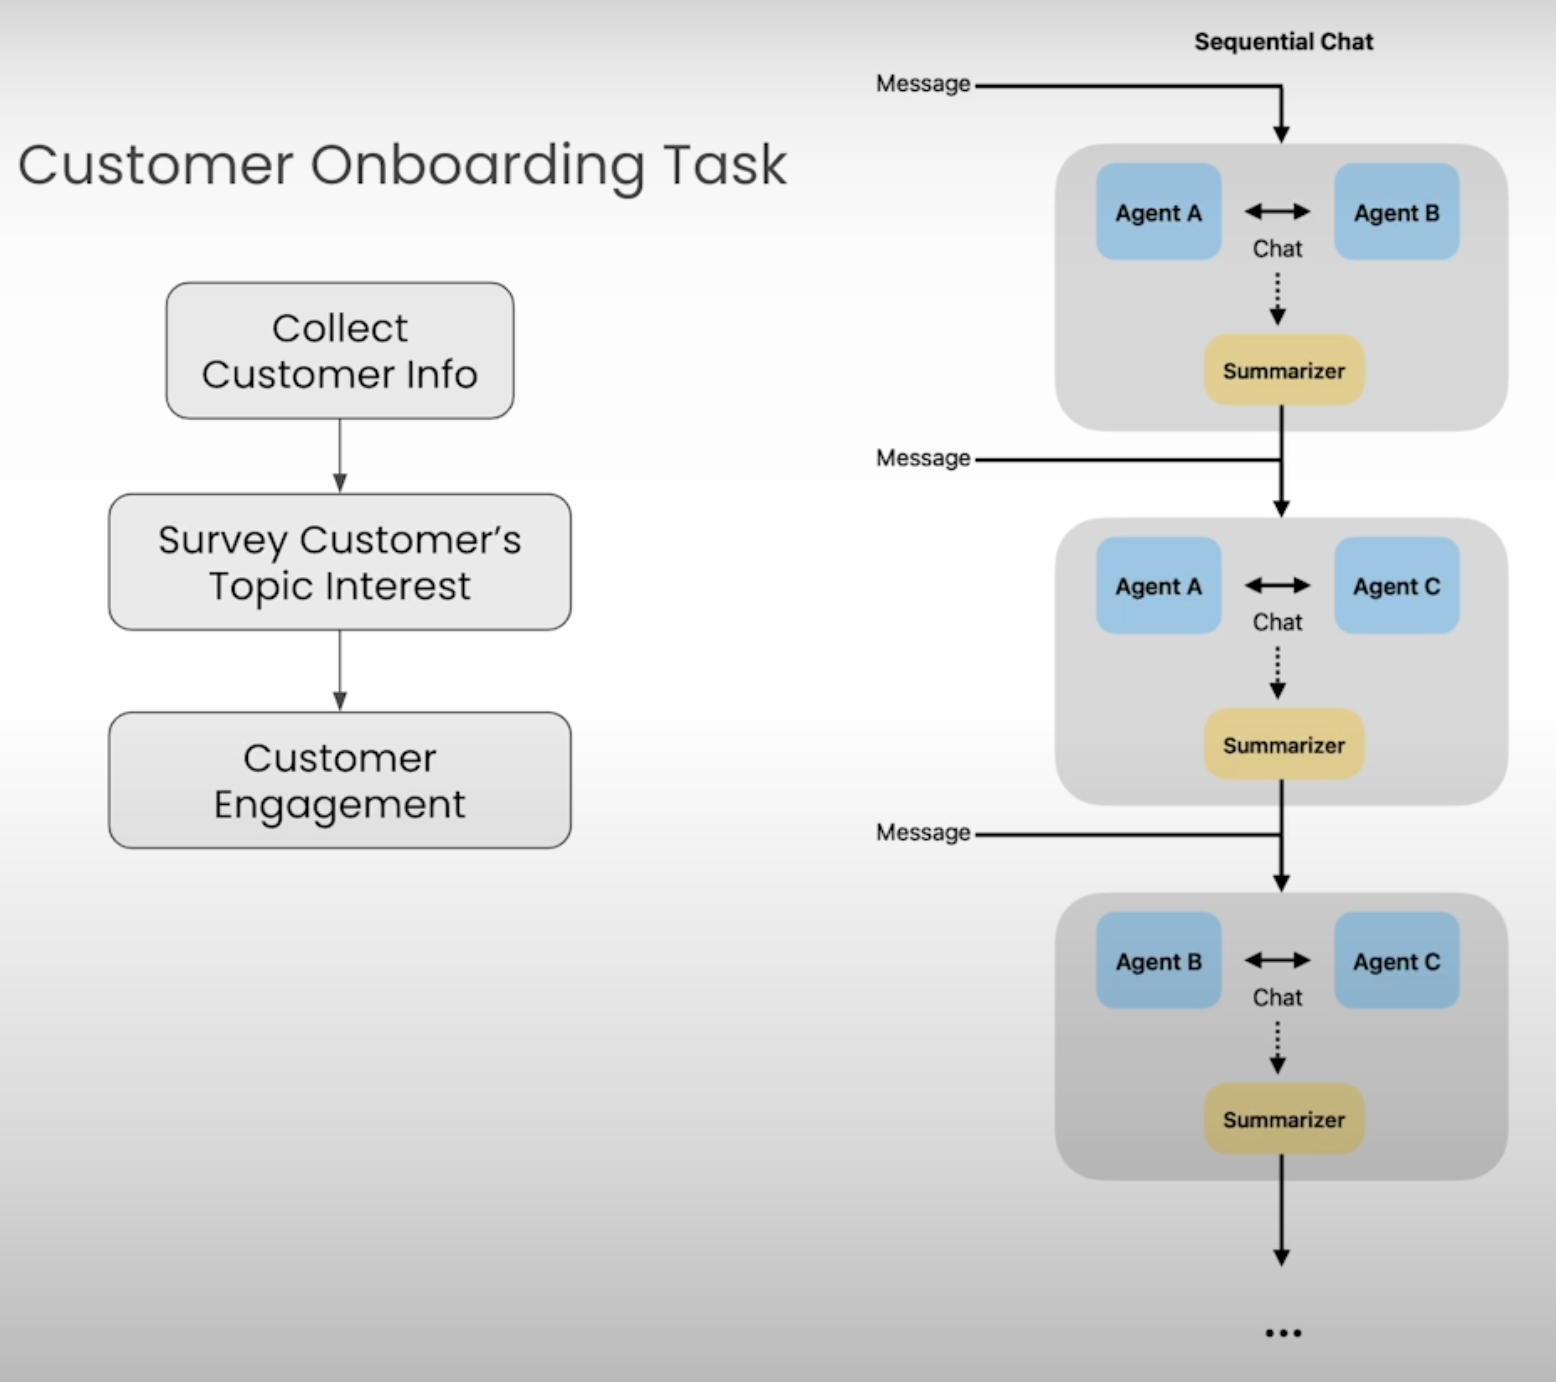

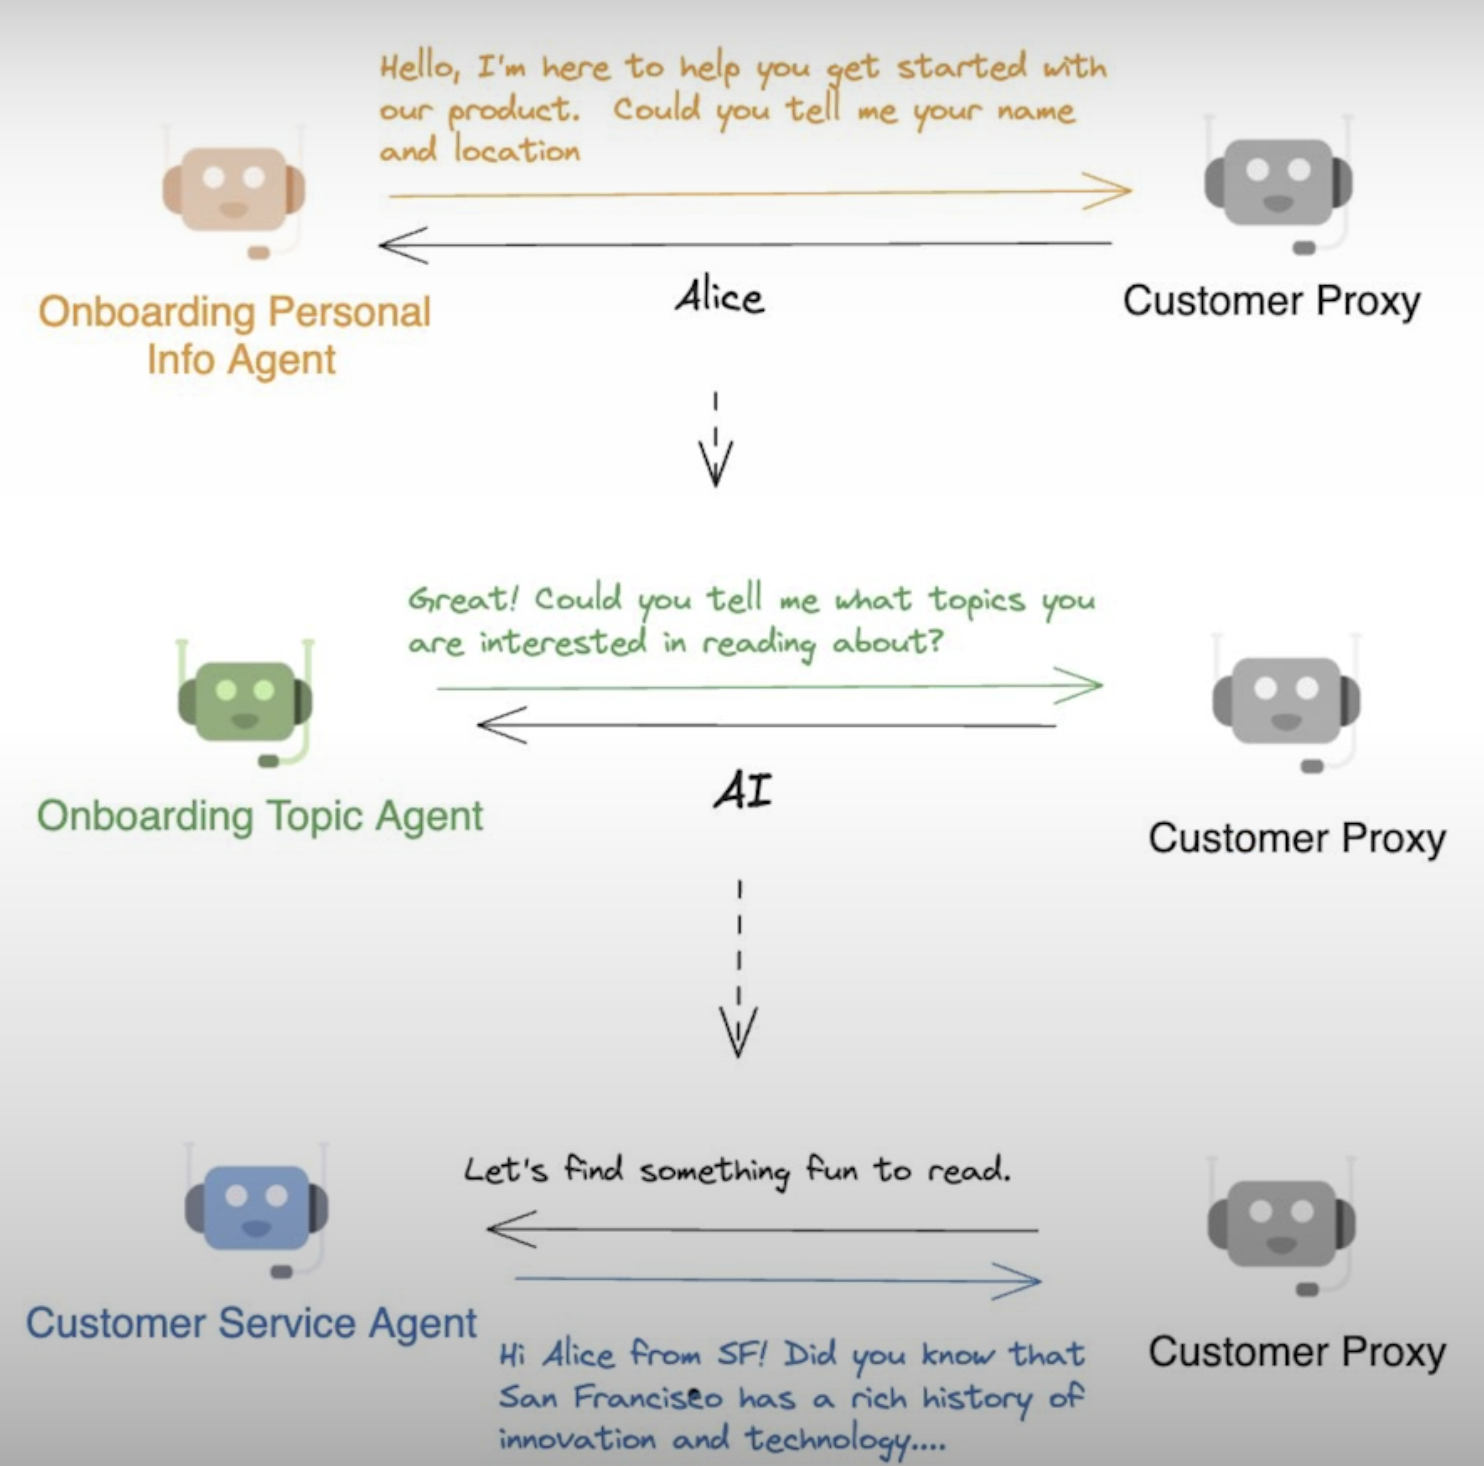

## Setup

In [1]:
llm_config={"model": "gpt-3.5-turbo"}

In [2]:
from autogen import ConversableAgent

## Creating the needed agents

In [7]:
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [4]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [5]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [6]:
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

## Creating tasks

Now, you can craft a series of tasks to facilitate the onboarding process.

In [8]:
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

## Start the onboarding process

In [9]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/site-packages/autogen/agentchat/chat.py:47: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: Cathy
customer_proxy_agent (to Onboarding Personal Information Agent):

Cathy

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

Thank you, may I also know your location please?

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: Bangalore
customer_proxy_agent (to Onboarding Personal Information Agent):

Bangalore

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Onboardin

## Print out the summary

In [10]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{
  "name": "Cathy",
  "location": "Bangalore"
}


Cathy from Bangalore is interested in reading about stars.


Cathy from Bangalore is interested in reading about stars and space. She might enjoy learning about how astronauts shower in space, using a special suction-based system.




## Print out the cost

In [11]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.000133, 'gpt-3.5-turbo-0125': {'cost': 0.000133, 'prompt_tokens': 179, 'completion_tokens': 29, 'total_tokens': 208}}, 'usage_excluding_cached_inference': {'total_cost': 0.000133, 'gpt-3.5-turbo-0125': {'cost': 0.000133, 'prompt_tokens': 179, 'completion_tokens': 29, 'total_tokens': 208}}}


{'usage_including_cached_inference': {'total_cost': 5.05e-05, 'gpt-3.5-turbo-0125': {'cost': 5.05e-05, 'prompt_tokens': 68, 'completion_tokens': 11, 'total_tokens': 79}}, 'usage_excluding_cached_inference': {'total_cost': 5.05e-05, 'gpt-3.5-turbo-0125': {'cost': 5.05e-05, 'prompt_tokens': 68, 'completion_tokens': 11, 'total_tokens': 79}}}


{'usage_including_cached_inference': {'total_cost': 0.00032950000000000004, 'gpt-3.5-turbo-0125': {'cost': 0.00032950000000000004, 'prompt_tokens': 281, 'completion_tokens': 126, 'total_tokens': 407}}, 'usage_excluding_cached_inference': {'total_cost': 0.00032950000000000004, 'gpt-3.5-turbo-0125': {'cost': 0.